In [1]:
import tensorflow as tf
import os #to read file and walk through the images
import numpy as np
import random

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

from tqdm import tqdm

seed=42
np.random.seed=seed

In [2]:
img_width=128
img_height=128
img_channels=3

In [3]:
# relative path where we have the images
Train_Path = r"E:\Major Project\UNet\data-science-bowl-2018\stage1_train/" # / at the end is imp.
Test_Path=r"E:\Major Project\UNet\data-science-bowl-2018\stage1_test/"

In [4]:
train_ids= next(os.walk(Train_Path))[1]
#os.walk(Train_Path): get to the folder and the image folder inside(in as tuple side by side | | | );
#[1] signifies we need the 1eth entry of the tuple i.e. inside folder path where we have the image 
#next keeps on reading file one after other
test_ids= next(os.walk(Test_Path))[1]

In [5]:
print(len(train_ids))

670


In [6]:
#an array of same dimension as input images to resize them
X_test= np.zeros((len(test_ids), img_height, img_width, img_channels), dtype=np.uint8)
#Y -> trying to prediction
Y_test= np.zeros((len(test_ids), img_height, img_width, 1), dtype=np.bool_) 

In [7]:
#an array of same dimension as input images to resize them
X_train= np.zeros((len(train_ids), img_height, img_width, img_channels), dtype=np.uint8)
#Y -> trying to prediction
Y_train= np.zeros((len(train_ids), img_height, img_width, 1), dtype=np.bool_) 

In [8]:
#resizing training images
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate (train_ids), total=len (train_ids)): #tqdm shows progress as for loop is executing
    path = Train_Path + id_ #goes inside image (folder with wierd name of nums and letters) folder where now we have 2 folders: image and mask
    img = imread(path + '/images/' + id_ + '.png')[:,:,:img_channels] #reading image(path, then selecting images folder and going inside it and specifing format of image)
    img = resize(img, (img_height, img_width), mode= 'constant', preserve_range=True) #resizing image
    X_train[n] = img #FiLL empty X_train with values from img
    mask = np.zeros((img_height, img_width, 1), dtype=np.bool_) #empty array for mask
    #for loop explaination: we have a whole bunch of images. Go through each image and create a trining image Y_train where every pixel is either 0 or 1 
    #if it is 1 that means there is a cell over there

    for mask_file in next (os.walk (path + '/masks/'))[2]:
        mask_= imread(path + '/masks/' + mask_file)
        mask_=np.expand_dims (resize(mask_, (img_height, img_width), mode= 'constant', preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask


Resizing training images and masks


 25%|██▌       | 170/670 [03:29<10:15,  1.23s/it] 


KeyboardInterrupt: 

In [ ]:
#resizing testing images
X_test = np.zeros((len(test_ids), img_height, img_width, img_channels), dtype=np.uint8)
sizes_test=[]
print('Resizing testing images and masks')
for n, id_ in tqdm(enumerate (test_ids), total=len (test_ids)): #tqdm shows progress as for loop is executing
    path = Test_Path + id_ #goes inside image (folder with wierd name of nums and letters) folder where now we have 2 folders: image and mask
    img = imread(path + '/images/' + id_ + '.png')[:,:,:img_channels] #reading image(path, then selecting images folder and going inside it and specifing format of image)
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (img_height, img_width), mode= 'constant', preserve_range=True) #resizing image
    X_test[n] = img #FiLL empty X_train with values from img

    print('done')

Resizing testing images and masks


  3%|▎         | 2/65 [00:00<00:03, 16.87it/s]

done
done
done
done
done


 12%|█▏        | 8/65 [00:00<00:03, 17.22it/s]

done
done
done
done
done
done


 25%|██▍       | 16/65 [00:00<00:01, 26.45it/s]

done
done
done
done
done
done
done
done
done


 38%|███▊      | 25/65 [00:00<00:01, 31.69it/s]

done
done
done
done
done
done
done
done


 54%|█████▍    | 35/65 [00:01<00:00, 38.51it/s]

done
done
done
done
done
done
done
done
done
done


 62%|██████▏   | 40/65 [00:01<00:00, 40.28it/s]

done
done
done
done
done
done


 75%|███████▌  | 49/65 [00:01<00:00, 35.50it/s]

done
done
done
done
done
done
done
done


 88%|████████▊ | 57/65 [00:01<00:00, 33.88it/s]

done
done
done
done
done
done
done
done
done


100%|██████████| 65/65 [00:02<00:00, 31.35it/s]

done
done
done
done


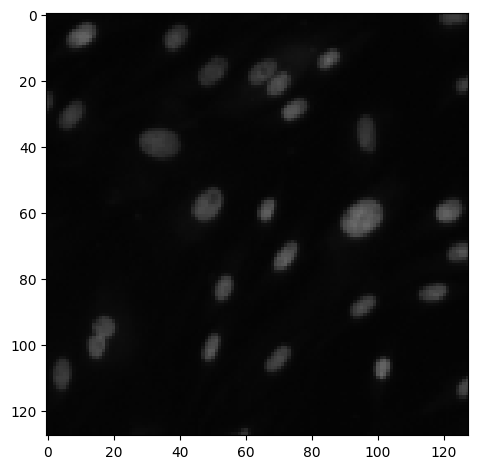

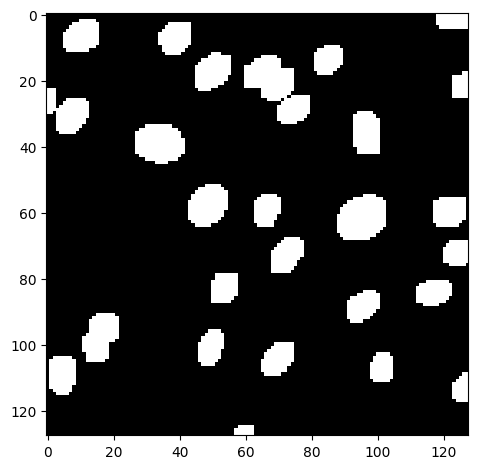

In [ ]:
#printing a random training and testing image
img_x=random.randint(0, len(train_ids)) #picking a random training image 
imshow(X_train[img_x])
plt.show()

imshow(np.squeeze(Y_train[img_x])) #we had to sqeeze as 
plt.show()

In [ ]:
#building the model
input=tf.keras.layers.Input((img_width, img_height, img_channels))

In [ ]:
#converting input values to float type values b/w 0-1 by dividing it by 255 as input valus goes from 0-255
s=tf.keras.layers.Lambda(lambda x: x/255)(input)

In [ ]:
#contraction path

#1st layer
# c1=tf.keras.layers.Conv2D(feature dimension,kernel size, activation='relu', kernel_initializer='he_normal', padding='same')(input)
c1=tf.keras.layers.Conv2D(16,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s) #1st convolution layer on converted input
c1=tf.keras.layers.Dropout(0.1)(c1) #drop out 10%
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)  #2nd convolution layer on 1st convolution layer
p1=tf.keras.layers.MaxPooling2D((2,2))(c1)#pooling

In [ ]:
#2nd layer
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(p1)
c2=tf.keras.layers.Dropout(0.1)(c2)
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(c2)
p2=tf.keras.layers.MaxPooling2D((2,2))(c2)

In [ ]:
#3rd layer
c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(p2)
c3=tf.keras.layers.Dropout(0.1)(c3)
c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(c3)
p3=tf.keras.layers.MaxPooling2D((2,2))(c3)

In [ ]:
#4th layer
c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(p3)
c4=tf.keras.layers.Dropout(0.1)(c4)
c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(c4)
p4=tf.keras.layers.MaxPooling2D((2,2))(c4)

In [ ]:
#5th layer base layer
c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(p4)
c5=tf.keras.layers.Dropout(0.1)(c5)
c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(c5)

In [ ]:
#Expansive Path

#6th Layer
u6=tf.keras.layers.Conv2DTranspose(128,(2,2), strides=(2,2),padding='same')(c5)
u6=tf.keras.layers.concatenate([u6,c4])
c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(u6)
c6=tf.keras.layers.Dropout(0.2)(c6)
c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(c6)

In [ ]:
#7th layer
u7=tf.keras.layers.Conv2DTranspose(64,(2,2), strides=(2,2), padding='same')(c6)
u7=tf.keras.layers.concatenate([u7,c3])
c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(u7)
c7=tf.keras.layers.Dropout(0.2)(c7)
c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(c7)

In [ ]:
#8th layer
u8=tf.keras.layers.Conv2DTranspose(32,(2,2), strides=(2,2), padding='same')(c7)
u8=tf.keras.layers.concatenate([u8,c2])
c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(u8)
c8=tf.keras.layers.Dropout(0.2)(c8)
c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(c8)

In [ ]:
#9th layer
u9=tf.keras.layers.Conv2DTranspose(16,(2,2), strides=(2,2), padding='same')(c8)
u9=tf.keras.layers.concatenate([u9,c1])
c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(u9)
c9=tf.keras.layers.Dropout(0.2)(c9)
c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal', padding='same')(c9)

In [ ]:
#output
output= tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid')(c9)

In [ ]:
model=tf.keras.Model(inputs=[input], outputs=[output])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [ ]:
##############
#Model CheckPoint
checkpointer= tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)
callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

model.fit(X_train,Y_train, validation_split=0.1, epochs=25, batch_size=16, callbacks=callbacks)
model.save('model.h5')


Epoch 1/25
38/38 [==============================] - 59s 2s/step - loss: 0.1158 - accuracy: 0.9558 - val_loss: 0.0979 - val_accuracy: 0.9617
Epoch 2/25
38/38 [==============================] - 59s 2s/step - loss: 0.1121 - accuracy: 0.9579 - val_loss: 0.1010 - val_accuracy: 0.9615
Epoch 3/25
38/38 [==============================] - 59s 2s/step - loss: 0.1097 - accuracy: 0.9583 - val_loss: 0.0912 - val_accuracy: 0.9642
Epoch 4/25
38/38 [==============================] - 59s 2s/step - loss: 0.1022 - accuracy: 0.9606 - val_loss: 0.0966 - val_accuracy: 0.9638
Epoch 5/25
38/38 [==============================] - 59s 2s/step - loss: 0.1041 - accuracy: 0.9599 - val_loss: 0.1018 - val_accuracy: 0.9619


In [ ]:
idx=random.randint(0,len(X_train))

In [ ]:
#after model fitting every picture has a probaability value
# the first 90% was used for training
pred_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
pred_val=model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
pred_test=model.predict(X_test, verbose=1)

3/3 [==============================] - 1s 296ms/step


In [ ]:
#setting a threshold value for the prediction value i.e.
#here anything above 0.5, convert it to 1
pred_train_t=(pred_train > 0.5).astype(np.uint8)
pred_val_t=(pred_val > 0.5).astype(np.uint8)
pred_test_t=(pred_test > 0.5).astype(np.uint8)


In [ ]:
#performing sanity check for training images
ix=random.randint(0,len(pred_train_t))

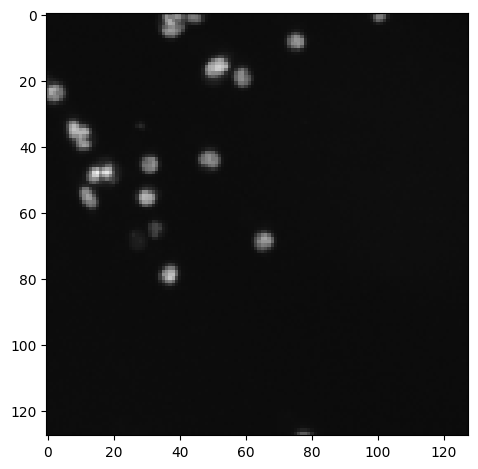

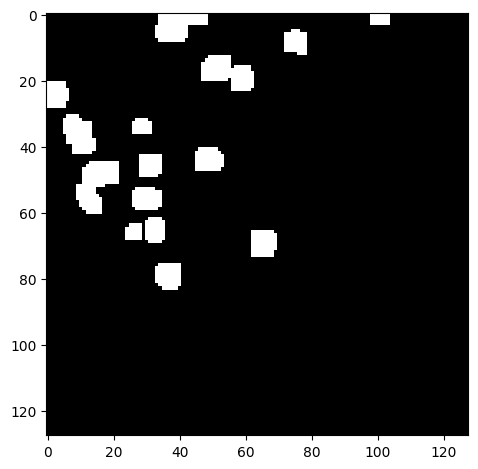

e:\Major Project\V_env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


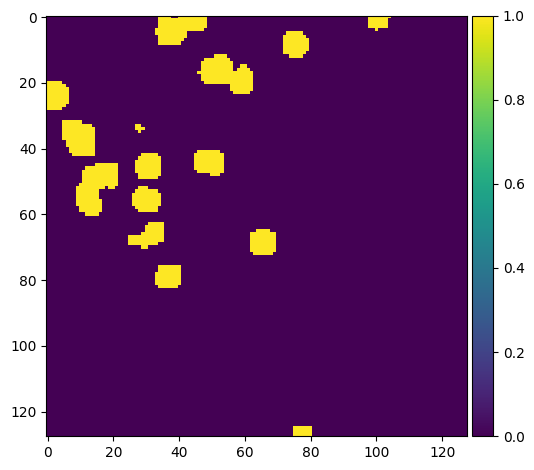

In [ ]:
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(pred_train_t[ix]))
plt.show()

In [ ]:
#performing a sanity check on some random validation images
ix=random.randint(0,len(pred_val_t))

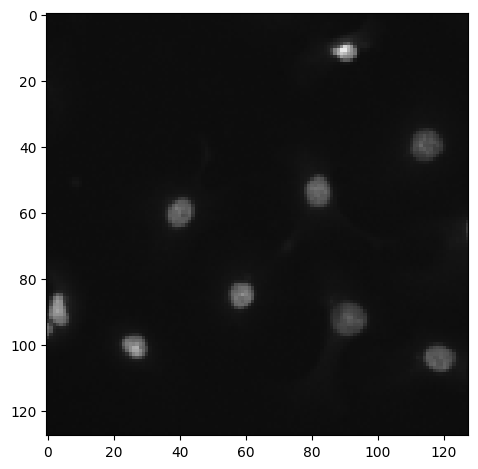

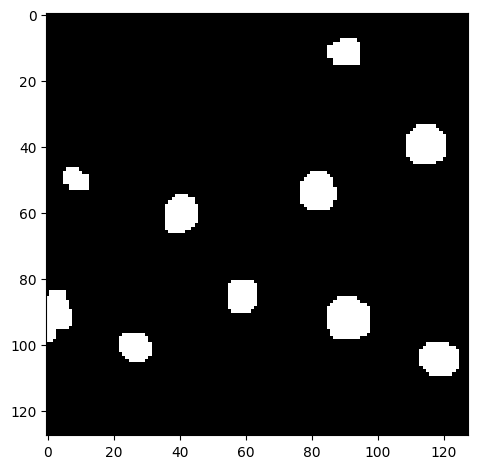

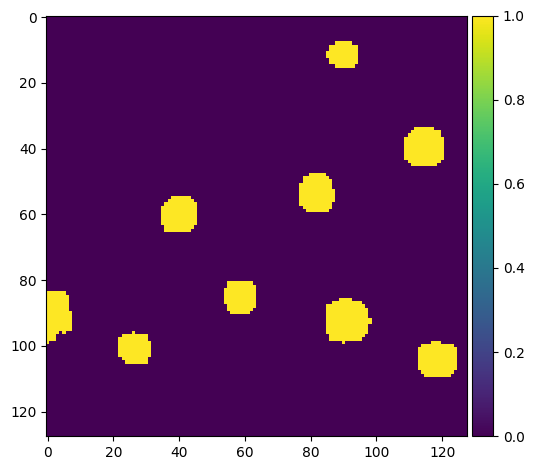

In [ ]:
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(pred_val_t[ix]))
plt.show()


In [ ]:
import sklearn.metrics as metrics
